In [11]:
#Import all the required libraries:
from qiskit import *
from qiskit import QuantumRegister
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit import Aer, QuantumCircuit, execute, ClassicalRegister, QuantumRegister, BasicAer

In [39]:
#Initialise the Aer Backend
backend = Aer.get_backend('qasm_simulator')
#Create 3 qubits, 2 of which are ancillas for repeating the original qubit:
qbit = QuantumRegister(3,'q')
#One Classical bit for measurement:
cbit = ClassicalRegister(1,'c')

In [79]:
#Creating the circuit:
circuit = QuantumCircuit(qbit,cbit)
#Adding the controlled-NOT gates for qubits 0 and 1, and 0 and 2 - 0 as target.
circuit.cx(qbit[0],qbit[1])
circuit.cx(qbit[0],qbit[2])
#Add a NOT gate to create bit flip error on qubit 1:
circuit.x(qbit[1])
#Measurement to show the bit flip error has occurred on qubit 1:
circuit.measure(qbit[1],cbit[0])

In [80]:
#Executing the program 1000 times:
job = execute(circuit, backend, shots=1000)
job_monitor(job)
counts = job.result().get_counts()
#Prints the measured output and the number of counts the program has been executed for:
print(counts)

Job Status: job has successfully run
{'1': 1000}


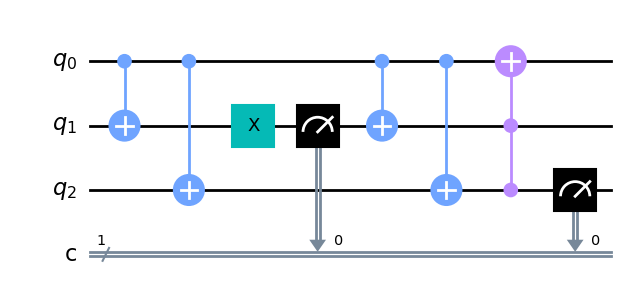

In [81]:
#Re-applying the controlled-NOT gates and a Toffoli gate for error correction:
circuit.cx(qbit[0],qbit[1])
circuit.cx(qbit[0],qbit[2])
circuit.ccx(qbit[2],qbit[1],qbit[0])
#Measuring the correction:
circuit.measure(qbit[1],cbit[0])
circuit.draw('mpl')

In [82]:
#Re-executing the program 1000 times, this time with error correction circuit:
job = execute(circuit, backend, shots=1000)
job_monitor(job)
counts = job.result().get_counts()
print(counts)

Job Status: job has successfully run
{'0': 1000}
